In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

import psycopg2 

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [3]:
atl_city_limits = gpd.read_file('shp_files/Atlanta_City_Limits/Atlanta_City_Limits.shp')

In [4]:
atl_city_limits

,OBJECTID_1,OBJECTID,ID,ACRES,SQ_MILES,LABEL,GLOBALID,SHAPE_Leng,SHAPE_Area,geometry
0,2,1,0,87420.6,136.59,Atlanta,{CAA9D147-B1A2-4AD5-A8EB-A3D2B41926C8},585248.044939,3.808010e+09,(POLYGON ((2219087.975183017 1331034.198425084...


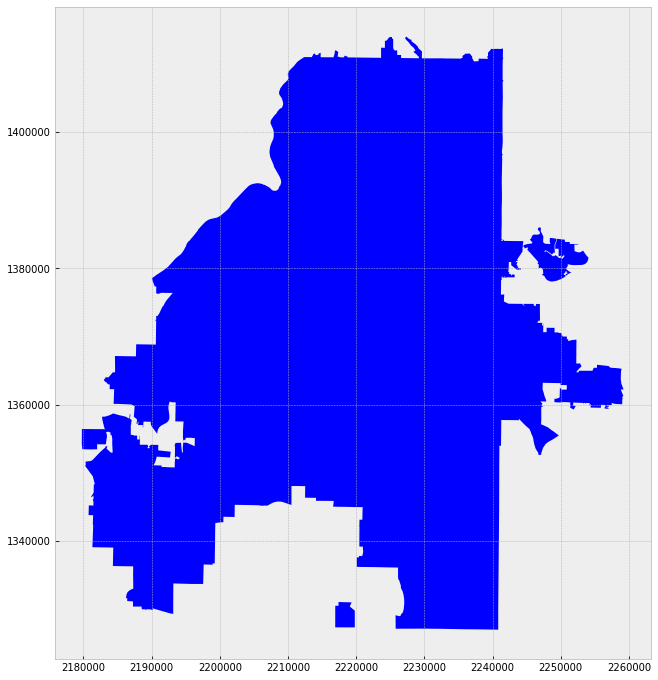

In [5]:
atl_city_limits.plot(figsize=(12,12))
plt.show()

In [6]:
greenspaces = gpd.read_file('shp_files/Greenspace/Greenspace.shp')

In [7]:
greenspaces.head()

,OBJECTID,NAME,NAME_2,COUNTY,CITY,OWNER,MANAGEMENT,TYPE,SOURCE,ACRES,GlobalID,last_edite,Ownership,geometry
0,1,City Park,,Cherokee,Ball Ground,Cherokee County,Cherokee County,Public Park,Georgia Tech,4.554891,{4DFF8A8E-0D27-4D59-90E2-2F8FAA24E1F3},2016-11-18T15:36:04.000Z,Public,"POLYGON ((-84.3716162560381 34.33846852950565,..."
1,2,Lions Field,,Cherokee,Ball Ground,Cherokee County,Cherokee County,Public Park,Georgia Tech,2.463503,{B799B698-7904-42B2-AB52-4B59D14DA725},2016-11-18T15:36:26.000Z,Public,POLYGON ((-84.37442643206047 34.33693312188487...
2,3,Underwood Hills Park,,Fulton,Atlanta,City of Atlanta,City of Atlanta,Public Park,Georgia Tech,9.799977,{AB39A767-A904-4668-93AC-27B04B5C6FE3},2016-11-18T15:36:26.000Z,Public,POLYGON ((-84.41636226746471 33.80471226738156...
3,4,Atlanta Memorial Park,,Fulton,Atlanta,City of Atlanta,City of Atlanta,Public Park,Georgia Tech,36.855975,{43E1FACF-73FD-43D5-8647-93DE24EBF86B},2016-11-18T15:36:26.000Z,Public,POLYGON ((-84.40770195649085 33.82055930022246...
4,5,McKinley-Wilson Triangle,,Fulton,Atlanta,City of Atlanta,City of Atlanta,Public Park,Georgia Tech,0.054448,{C4B517CE-0E35-42AA-A9B0-0DFD4115DBAD},2016-11-18T15:36:04.000Z,Public,POLYGON ((-84.40888440467457 33.81508997103433...


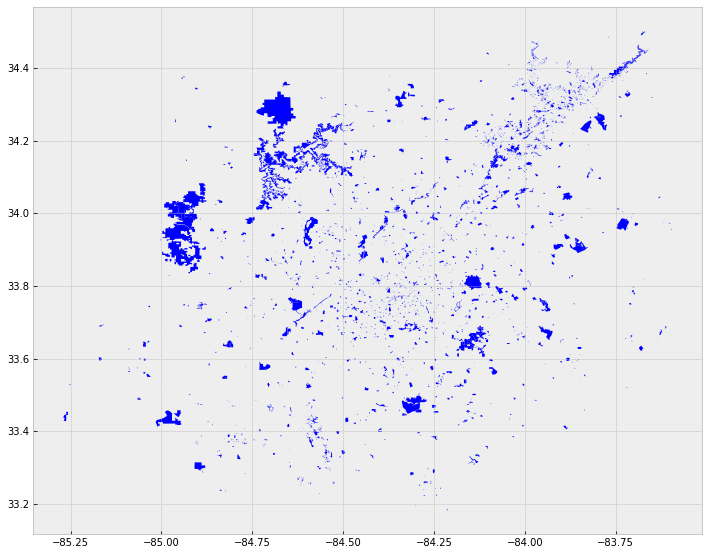

In [8]:
greenspaces.plot(figsize=(12,12))
plt.show()

In [23]:
conn = psycopg2.connect(
    database='greenspace',
    user='jreed',
    host='127.0.0.1',
    port='5432'
)

sql = "select name, geom from atl_greenspaces;"
atl_greenspaces = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

sql = "select name, geom from atl_limits;"
atl_limits = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

In [24]:
atl_greenspaces.head()

,name,geom
0,East Club-Lakehaven Triangle,(POLYGON ((-84.35168364575169 33.8698077936008...
1,Ranier Circle,(POLYGON ((-84.4199329798256 33.85282890999962...
2,Roxboro Circle,(POLYGON ((-84.35281879198395 33.8497915369624...
3,Vermont Road Park,(POLYGON ((-84.35565829253075 33.8590482495596...
4,Club Drive-Davidson Triangle,(POLYGON ((-84.35601146041874 33.8717107388613...


In [25]:
atl_limits.head()

,name,geom
0,Atlanta,(POLYGON ((-84.3872252101154 33.88091293457729...


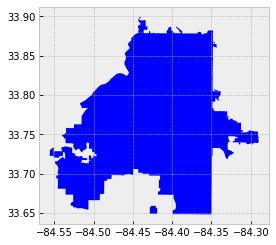

In [30]:
ax = atl_greenspaces.plot()
atl_limits.plot(ax=ax)
plt.show()

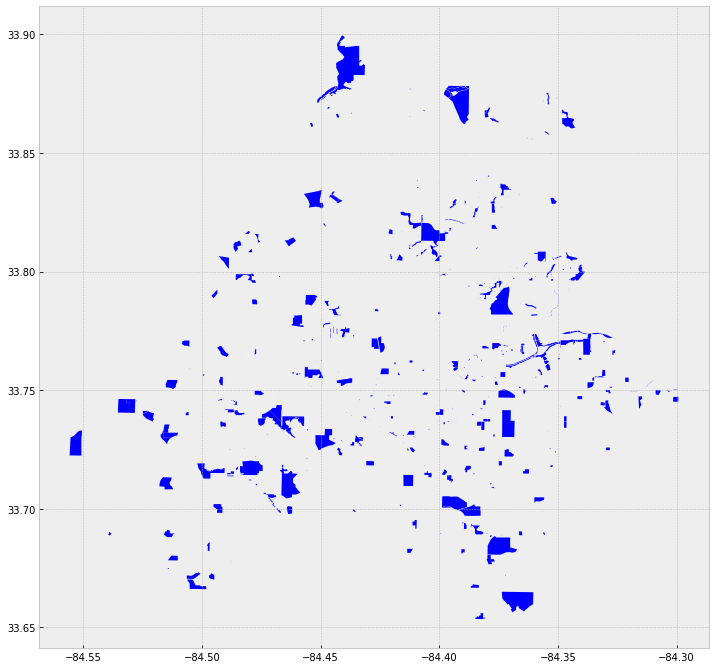

In [31]:
atl_greenspaces.plot(figsize=(12,12))
plt.show()

In [19]:
conn.close()